In [2]:
from matplotlib import pyplot as plt
import sncosmo
from sntd import simulation, fitting,io
from sntd.plotting import _COLORLIST5
import sys
import numpy as np
from astropy.io import ascii

\begin{table}
\begin{tabular}{cccccc}
band & time & gain & skynoise & zp & zpsys \\
 & Days &  & Counts &  &  \\
F125W & 0.0 & 50.0 & 0.007714862588764937 & 26.0 & AB \\
F125W & 3.0 & 50.0 & 0.02796272278768672 & 26.0 & AB \\
F125W & 6.0 & 50.0 & 0.008153996001634535 & 26.0 & AB \\
F125W & 9.0 & 50.0 & 0.025847376127105158 & 26.0 & AB \\
F125W & 12.0 & 50.0 & 0.01199590124526456 & 26.0 & AB \\
F125W & 15.0 & 50.0 & 0.0260303229827036 & 26.0 & AB \\
F125W & 18.0 & 50.0 & 0.01321420662554311 & 26.0 & AB \\
F125W & 21.0 & 50.0 & 0.014097111253957368 & 26.0 & AB \\
F125W & 24.0 & 50.0 & 0.02908963260769038 & 26.0 & AB \\
F125W & 27.0 & 50.0 & 0.007300508011208333 & 26.0 & AB \\
F125W & 30.0 & 50.0 & 0.029138678669609633 & 26.0 & AB \\
F125W & 33.0 & 50.0 & 0.007896597335273994 & 26.0 & AB \\
F125W & 36.0 & 50.0 & 0.02493036606797398 & 26.0 & AB \\
F125W & 39.0 & 50.0 & 0.025253123151836292 & 26.0 & AB \\
F125W & 42.0 & 50.0 & 0.021085999220706825 & 26.0 & AB \\
F125W & 45.0 & 50.0 & 0.0089

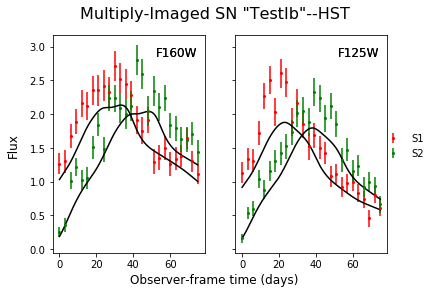

SystemExit: 

In [38]:
reload(fitting) 
reload(simulation) 
nsim = 5
dt_fit_list = [] 
murel_fit_list = [] 

for isim in range(nsim):

    # Part 1 : simulate a doubly-imaged Type Ib SN and fit for time delays
    modname = 'snana-2004gv'
    snType = 'Ib'
    #bandlist = ['bessellb', 'bessellv', 'bessellr']
    bandlist = ['F125W','F160W']
    lcs = simulation.createMultiplyImagedSN(
        modname, snType, 1.33,z_lens=.5, bands=bandlist,
        zp=26.0, cadence=3., epochs=25.,skynoiseRange=(.005,.03),gain=50. ,mjdRange=[0,100.], time_delays=[0., 15.],
        magnifications=np.random.uniform(4,6,2), objectName='Test'+snType, telescopename='HST',
        microlensing_type='AchromaticSplineMicrolensing',
        microlensing_params=[4,2,50],minsnr=5.0)
    
    lcs.plot_object(showfig=True,savefig=False,showmodel=True)
    plt.show()
    sys.exit()
    #print(lcs.images['S1'].simMeta)
    
    ifig = 0
    print("Simulated strongly lensed SN %i"%isim)
    #lcs.plot_object(showfig=True,savefig=False)

    # Part 2: fit each light curve separately to determine lensing parameters
    lcs_tdfit=fitting.fit_data(lcs, snType='Ib', models=['snana-2004gv'],dust='CCM89Dust',effect_frames=['rest'],
                                effect_names=['host'],
                                params=['z','amplitude','t0','hostebv'],
                                bounds={'hostebv':(0,1),'z':(1.28,1.32),'t0':(-10,10)},
                                combined_or_separate='separate',
                                method='minuit')



    # TODO: make this more general, i.e. use keywords list instead of s1 and s2.
    #t0_s1 = lcs_tdfit.images['S1'].fits.model.get('t0')
    #t0_s2 = lcs_tdfit.images['S2'].fits.model.get('t0')
    print(np.abs(lcs_tdfit.time_delays['S2']))
    #A_s1 = lcs_tdfit.images['S1'].fits.model.get('amplitude')
    #A_s2 = lcs_tdfit.images['S2'].fits.model.get('amplitude')
    dt_fit_list.append(np.abs(lcs_tdfit.time_delays['S2']))
    #murel_fit_list.append(A_s2/A_s1)
    #plt.plot(dt_fit_list, murel_fit_list,marker='o', color=_COLORLIST5[3], ls=' ')
fig=plt.figure(figsize=(20,10)) 
ax=fig.gca() 
ax.hist(dt_fit_list, bins=nsim/5, normed=True,label='Measured Time Delay')

ax.plot([15,15],ax.get_ylim(),'r--',label='Actual Time Delay') 
ax.legend(loc='upper left',fontsize=16) 
ax.set_title('Type Ib Doubly-Imaged Time Delay Measurement--N=100',size=24) 
ax.set_ylabel('Probability Density',size=20) 
ax.set_xlabel('Relative Time Delay (Days)',size=20) 
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

plt.show()
plt.close()